<a id="notebook_template_top"></a>

# Notebook Title (Set to title of notebook)

<hr>

# Notebook Summary

This section of the introduction should provide an overview of the notebook's context and intent. It should explain why the notebook exists (its goal), what it does (its "algorithm"), and why it does what it does (how it achieves or progresses toward the goal).

<hr>

# Index

* [Import Dependencies and Connect to the Data Cube](#notebook_template_import)
* [Choose Platforms and Products](#notebook_template_plat_prod)
* [Get the Extents of the Cube](#notebook_template_extents)
* [Define the Analysis Parameters](#notebook_template_parameters)
* [Load and Clean Data from the Data Cube](#notebook_template_load)
* [Visualization](#notebook_template_visualize)

As we will see below, every section in the index must have a matching heading in the body, and primary sections (level 1 - e.g. "Choose Platforms and Products") must by hyperlinked to their headings in the body.

Remember to check that (1) section headings in the index successfully link to the headings in the body and (2) the arrows by the headings in the body successfully link to the top of the notebook (see the `<a>` tag at the top of this cell).

## <a id="notebook_template_import"></a> Import Dependencies and Connect to the Data Cube [&#9652;](#notebook_template_top)

**Option 1: Simpler - typically intended for internal use, quickly creating a first version of a notebook without widgets**

In [1]:
# Enable importing of our utilities.
import sys
import os
sys.path.append(os.environ.get('NOTEBOOK_ROOT'))

# Import the most commonly used packages in our notebooks.
import datacube # Facilitates loading data from the Data Cube
import numpy as np # Numerical processing, including time
import pandas as pd # Tabular data structures - used for data analysis
import xarray as xr # Coordinate indexed arrays
import matplotlib.pyplot as plt

# Connect to the Data Cube.
dc = datacube.Datacube(app='notebook_name')

**Option 2: User-friendly - allowing users to set notebook parameters with widgets**

In [2]:
# Enable importing of our utilities.
import sys
sys.path.append('..')

# Import the most commonly used packages in our notebooks.
import datacube
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Import extra widget and plotting libraries.
import bokeh
import holoviews as hv
import panel as pn

# Connect to the Data Cube.
dc = datacube.Datacube(app='notebook_name')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
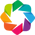

Loading BokehJS ...

In [3]:
# Configure visualization libraries.
pn.extension()
# Use the bokeh backend for HoloViews.
hv.extension('bokeh')
bokeh.io.output_notebook() 

## <a id="notebook_template_plat_prod"></a> Choose Platforms and Products [&#9652;](#notebook_template_top)

**Option 1: Simpler - Show available platforms and products, choose with text**

In [4]:
# Get available products
products_info = dc.list_products()

# List LANDSAT 7 products
print("LANDSAT 7 Products:")
products_info[["platform", "name"]][products_info.platform == "LANDSAT_7"]

LANDSAT 7 Products:


platform                      name
id                                     
12  LANDSAT_7  ls7_collections_sr_scene
13  LANDSAT_7          ls7_ledaps_ghana
17  LANDSAT_7          ls7_ledaps_kenya
18  LANDSAT_7        ls7_ledaps_senegal
16  LANDSAT_7   ls7_ledaps_sierra_leone
19  LANDSAT_7       ls7_ledaps_tanzania
31  LANDSAT_7        ls7_ledaps_vietnam

In [5]:
# List LANDSAT 8 products
print("LANDSAT 8 Products:")
products_info[["platform", "name"]][products_info.platform == "LANDSAT_8"]

LANDSAT 8 Products:


platform                      name
id                                     
7   LANDSAT_8  ls8_collections_sr_scene
9   LANDSAT_8           ls8_lasrc_ghana
10  LANDSAT_8           ls8_lasrc_kenya
11  LANDSAT_8         ls8_lasrc_senegal
8   LANDSAT_8    ls8_lasrc_sierra_leone
15  LANDSAT_8        ls8_lasrc_tanzania

In [6]:
platform = "LANDSAT_8"
product = "ls8_lasrc_kenya"

**Option 2: User-friendly - Allow selection of platforms and products with widgets**

In [7]:
def get_prods_for_platform(platform):
    prod_info = dc.list_products()
    return list(prod_info.loc[prod_info.platform == platform].name)

platforms = ["LANDSAT_7", "LANDSAT_8"]
platform_wgt = pn.widgets.Select(name='platform', value='LANDSAT_8', options=platforms)
prod_wgt = pn.widgets.Select(name='product', value="ls8_lasrc_kenya", options=get_prods_for_platform(platform_wgt.value))

@pn.depends(platform_wgt.param.value, watch=True)
def update_prod_list(platform):
    prods = get_prods_for_platform(platform)
    prod_wgt.options = prods
    prod_wgt.value = prods[0] if len(prods) > 0 else None

pn.Row(platform_wgt, prod_wgt)

Row
    [0] Select(name='platform', options=['LANDSAT_7', ...], value='LANDSAT_8')
    [1] Select(name='product', options=['ls8_collections_sr_scene...], value='ls8_lasrc_kenya')

## <a id="notebook_template_extents"></a> Get the Extents of the Cube [&#9652;](#notebook_template_top)

In [8]:
common_load_params = dict(output_crs="EPSG:4326", 
                          resolution=(-0.00027,-0.00027))

**Option 1: Simpler - if no widgets were used above**

In [9]:
from utils.data_cube_utilities.dc_time import dt_to_str

metadata = dc.load(platform=platform, 
                   product=product, 
                   measurements=[], 
                   **common_load_params)

full_lat = metadata.latitude.values[[-1,0]]
full_lon = metadata.longitude.values[[0,-1]]
min_max_dates = list(map(dt_to_str, map(pd.to_datetime, metadata.time.values[[0,-1]])))

# Print the extents of the combined data.
print("Latitude Extents:", full_lat)
print("Longitude Extents:", full_lon)
print("Time Extents:", min_max_dates)

Latitude Extents: [-4.997295  5.997105]
Longitude Extents: [41.982975 32.986845]
Time Extents: ['2013-04-12', '2020-01-19']


**Option 2: User-friendly - if widgets were used above**

In [10]:
from utils.data_cube_utilities.dc_time import dt_to_str

metadata = dc.load(platform=platform_wgt.value, 
                   product=prod_wgt.value, 
                   measurements=[], 
                   **common_load_params)

full_lat = metadata.latitude.values[[-1,0]]
full_lon = metadata.longitude.values[[0,-1]]
min_max_dates = list(map(dt_to_str, map(pd.to_datetime, metadata.time.values[[0,-1]])))

# Print the extents of the combined data.
print("Latitude Extents:", full_lat)
print("Longitude Extents:", full_lon)
print("Time Extents:", min_max_dates)

Latitude Extents: [-4.997295  5.997105]
Longitude Extents: [41.982975 32.986845]
Time Extents: ['2013-04-12', '2020-01-19']


**Visualize the available area**

In [11]:
from utils.data_cube_utilities.dc_display_map import display_map
display_map(full_lat, full_lon)

## <a id="notebook_template_parameters"></a> Define the Analysis Parameters [&#9652;](#notebook_template_top)

### Analysis parameters

An *optional* section to inform the user of any parameters they'll need to configure to run the notebook, such as spatial and temporal extents (latitude, longitude, easting, northing, time), although those may be considered simple and common enough to omit here:

* `param_name_1`: Simple description (e.g. `example_value`). Advice about appropriate values to choose for this parameter.
* `param_name_2`: Simple description (e.g. `example_value`). Advice about appropriate values to choose for this parameter.


**Option 1: Simpler - Allow selection of location and time by uncommenting a location's `lat`, `lon`, and `time_extents` variable assignments and commenting those for other locations**

In [12]:
# Mombasa, Kenya
lat = (-4.1131, -3.9853)
lon = (39.5445, 39.7420)
time_extents = ("2014-01-01", "2014-12-31")

# Freetown, Sierra Leone
# lat = (8.3267, 8.5123)
# lon = (-13.3109, -13.1197)
# time_extents = ("2014-01-01", "2014-12-31")

# Tano-Offin Forest - Ghana
# lat = (6.5814, 6.8978)
# lon = (-2.2955, -1.9395)
# time_extents = ("2014-01-01", "2014-12-31")

**Option 2: User-friendly - Allow selection of location and time with widgets**

In [13]:
from time import sleep
import datetime

def str_date_to_dt(date):
    return datetime.datetime.strptime(date, '%Y-%m-%d')

# Select an analysis region (Lat-Lon) within the extents listed above. 
# HINT: Keep your region small (<0.5 deg square) to avoid memory overload issues
# Select a time period (Min-Max) within the extents

## Location, date, and spatial slider widgets ##

locations = {'Mombasa, Kenya': {'lat': (-4.1131, -3.9853), 'lon': (39.5445, 39.7420)},
         'Freetown, Sierra Leone': {'lat': (8.3267, 8.5123), 'lon': (-13.3109, -13.1197)},
         'Tano-Offin Forest - Ghana': {'lat': (6.5814, 6.8978), 'lon': (-2.2955, -1.9395)},
         'Custom': {}}
location_wgt = pn.widgets.Select(name='Location', value='Mombasa, Kenya', options=list(locations.keys()))
date_wgt = pn.widgets.DateRangeSlider(name='Time Range', 
                                      start=str_date_to_dt(min_max_dates[0]), 
                                      end=str_date_to_dt(min_max_dates[1]), 
                                      value=(datetime.datetime(2017,1,1), datetime.datetime(2017,12,31)))
lat_wgt = pn.widgets.RangeSlider(name='Latitude', start=full_lat[0], end=full_lat[1], step=0.1,
                                 value=locations[location_wgt.value]['lat'])
lon_wgt = pn.widgets.RangeSlider(name='Longitude', start=full_lon[0], end=full_lon[1], step=0.1,
                                 value=locations[location_wgt.value]['lon'])

# If true, denotes that changes in lat/lon are caused by a location widget change,
# not a change in one of the 4 float widgets (lat min, lat max, lon min, lon max).
location_changed = [False]
@pn.depends(location_wgt.param.value, watch=True)
def location_handler(location, location_changed=location_changed):
    # Update the lat/lon sliders with the values for the selected location.
    if location != 'Custom':
        location_changed[0] = True
        lat_wgt.value = locations[location].get('lat', lat_wgt.value)
        lon_wgt.value = locations[location].get('lon', lon_wgt.value)
        location_changed[0] = False

@pn.depends(lat_wgt.param.value, lon_wgt.param.value, watch=True)
def lat_lon_sliders_handler(lat, lon, location_changed=location_changed):
    sleep(0.01)
    # If the latitude or longitude are changed other than due to a newly
    # selected location (location widget), note that this is a custom location.
    if not location_changed[0]:
        location_wgt.value = 'Custom'

## End location, date, and spatial slider widgets ##

## Spatial extents float widgets ##

# Using the `panel.depends` decorator with these widgets in Panel version 0.8.3 does not work.
def set_lat_min_by_flt(evt):
    try:
        lat_min = float(evt.new)
        lat_wgt.value = (lat_min, lat_wgt.value[1])
    except:
        return
lat_min_flt_wgt = pn.widgets.LiteralInput(name='Latitude Min', value=lat_wgt.value[0], type=float)
lat_min_flt_wgt.param.watch(set_lat_min_by_flt, 'value')

def set_lat_max_by_flt(evt):
    try:
        lat_max = float(evt.new)
        lat_wgt.value = (lat_wgt.value[0], lat_max)
    except:
        return
lat_max_flt_wgt = pn.widgets.LiteralInput(name='Latitude Max', value=lat_wgt.value[1], type=float)
lat_max_flt_wgt.param.watch(set_lat_max_by_flt, 'value')

def set_lon_min_by_flt(evt):
    try:
        lon_min = float(evt.new)
        lon_wgt.value = (lon_min, lon_wgt.value[1])
    except:
        return
lon_min_flt_wgt = pn.widgets.LiteralInput(name='Longitude Min', value=lon_wgt.value[0], type=float)
lon_min_flt_wgt.param.watch(set_lon_min_by_flt, 'value')

def set_lon_max_by_flt(evt):
    try:
        lon_max = float(evt.new)
        lon_wgt.value = (lon_wgt.value[0], lon_max)
    except:
        return
lon_max_flt_wgt = pn.widgets.LiteralInput(name='Longitude Max', value=lon_wgt.value[1], type=float)
lon_max_flt_wgt.param.watch(set_lon_max_by_flt, 'value')

## End spatial extents float widgets ##
std_height = 50
std_width = 50
widgets_row_fmt = dict(width=6*std_width)
pn.Row(
    pn.WidgetBox(
        pn.Row(location_wgt, 
               **widgets_row_fmt, height=std_height), 
        pn.Row(date_wgt, 
               **widgets_row_fmt, height=std_height),
        pn.Row(lat_min_flt_wgt, lat_max_flt_wgt, 
               **widgets_row_fmt, height=std_height),
        pn.Row(lat_wgt, 
               **widgets_row_fmt, height=std_height), 
        pn.Row(lon_min_flt_wgt, lon_max_flt_wgt, 
               **widgets_row_fmt, height=std_height),
        pn.Row(lon_wgt, 
               **widgets_row_fmt, height=std_height)),
    pn.WidgetBox("""
       ## Information
       Select a location to set the latitude and longitude sliders. <br><br>
       You can set the area with the numeric widgets. <br><br>
       You can also drag the lower (left) and upper (right) values in the sliders to set the time range and area.""", 
                 **widgets_row_fmt))

Row
    [0] WidgetBox
        [0] Row(height=50, sizing_mode='fixed', width=300)
            [0] Select(name='Location', options=['Mombasa, Kenya', ...], value='Mombasa, Kenya')
        [1] Row(height=50, sizing_mode='fixed', width=300)
            [0] DateRangeSlider(end=datetime.datetime(2020, ..., name='Time Range', start=datetime.datetime(2013, ..., value=(datetime.datetime(2017, ...)
        [2] Row(height=50, sizing_mode='fixed', width=300)
            [0] LiteralInput(name='Latitude Min', type=<class 'float'>, value=-4.1131)
            [1] LiteralInput(name='Latitude Max', type=<class 'float'>, value=-3.9853)
        [3] Row(height=50, sizing_mode='fixed', width=300)
            [0] RangeSlider(end=5.9971049999999995, name='Latitude', start=-4.997295000000001, value=(-4.1131, -3.9853))
        [4] Row(height=50, sizing_mode='fixed', width=300)
            [0] LiteralInput(name='Longitude Min', type=<class 'float'>, value=39.5445)
            [1] LiteralInput(name='Longitude Max', type=<class 'float'>, value=39.742)
        [5] Row(height=50, sizing_mode='fixed', width=300)
            [0] RangeSlider(end=32.986845, name='Longitude', start=41.982975, value=(39.5445, 39.742))
    [1] WidgetBox(width=300)
        [0] Markdown(str)

**Visualize the selected area**

**Option 1: Simpler - if no widgets were used above**

In [14]:
display_map(lat,lon)

**Option 2: User-friendly - if widgets were used above**

In [15]:
display_map(lat_wgt.value,lon_wgt.value)

## <a id="notebook_template_load"></a> Load and Clean Data from the Data Cube [&#9652;](#notebook_template_top)

**Option 1: Simple - load normally, using NumPy**

**This is a fairly fast and reliable way to process the data - once it is loaded.
All of the data is loaded together, so you will enconter memory limits for large queries, but
NumPy is more widely supported and generally easier to work with than the alternative in option 2.
Try getting a notebook working with this option first.**

In [16]:
measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']
# The `dask_chunks={'time':1}` serves to speed up queries from S3 
# through parallel downloads using Dask. But calling `.compute()` converts
# the data in the data variables in the returned `xarray.Dataset` to NumPy arrays
# instead of Dask arrays, so the result is the same as not loading with Dask.
landsat_dataset = dc.load(platform = platform,
                          product = product,
                          latitude = lat,
                          longitude = lon,
                          time = time_extents,
                          measurements = measurements,
                          group_by='solar_day', 
                          dask_chunks={'time':1},
                          **common_load_params).compute()

**Mask out clouds**

In [17]:
from utils.data_cube_utilities.clean_mask import landsat_qa_clean_mask, landsat_clean_mask_invalid

cloud_mask = (landsat_qa_clean_mask(landsat_dataset, platform=platform) & \
             (landsat_dataset != -9999).to_array().any('variable') & \
             landsat_clean_mask_invalid(landsat_dataset))
landsat_dataset = landsat_dataset.where(cloud_mask).drop('pixel_qa')

**Option 2: Scalable - load with Dask**

**This is an even faster and much more scalable way to process the data. 
Chunks of the data are loaded and processed in a stream of tasks in parallel.
Dask will avoid running out of memory within its ability. Simply provide it with a reasonable chunk size - about 200 MiB per chunk, though that will vary with the performance characteristics of the functions being applied to the data. Note that not all tasks that work with option 1 work with option 2.**

In [18]:
measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']
landsat_dataset = dc.load(latitude = lat_wgt.value,
                          longitude = lon_wgt.value,
                          platform = platform_wgt.value,
                          time = date_wgt.value,
                          product = prod_wgt.value,
                          measurements = measurements,
                          group_by='solar_day', 
                          dask_chunks={'latitude':1500, 'longitude':1500, 'time':1})

**Mask out clouds**

In [19]:
from utils.data_cube_utilities.clean_mask import landsat_qa_clean_mask, landsat_clean_mask_invalid

cloud_mask = (landsat_qa_clean_mask(landsat_dataset, platform=platform_wgt.value) & \
             (landsat_dataset != -9999).to_array().any('variable') & \
             landsat_clean_mask_invalid(landsat_dataset))
landsat_dataset = landsat_dataset.where(cloud_mask).drop('pixel_qa')

In [20]:
cloud_mask = cloud_mask.persist()
landsat_dataset = landsat_dataset.persist()

## <a id="notebook_template_visualize"></a> Visualization [&#9652;](#notebook_template_top)

**Create a mosaic for the sake of demonstration**

In [21]:
from utils.data_cube_utilities.dc_mosaic import create_hdmedians_multiple_band_mosaic
from utils.data_cube_utilities.plotter_utils import figure_ratio

mosaic = create_hdmedians_multiple_band_mosaic(landsat_dataset[['red', 'green', 'blue']], cloud_mask)
rgb = mosaic.to_array().transpose('latitude', 'longitude', 'variable')
rgb_scaled = ((rgb - rgb.min()) / (rgb.max() - rgb.min())).persist()

# Define the size of the plots.
width, height = figure_ratio(landsat_dataset, fixed_width=12)
width, height = int(width), int(height)

**Option 1: Simple - Matplotlib, Seaborn, Plotly**

* Matplotlib is most useful for quick, simple plotting 
* Seaborn is most useful for plotting pandas data (tabular datasets)
* Plotly is most useful for interactive visualizations

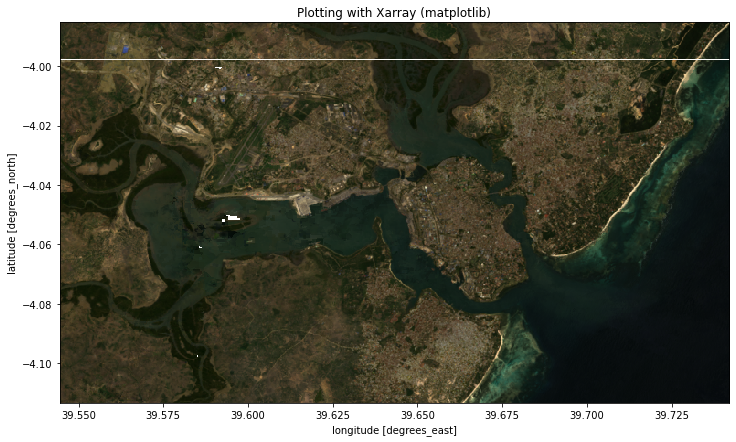

In [22]:
# Plot a particular time using the xarray object (which uses matplotlib).
rgb_scaled.compute().plot.imshow(figsize=(width, height))
plt.title('Plotting with Xarray (matplotlib)')
plt.show()

**Option 2: Scalable, Beautiful - HoloViews, Datashader - prefer if option 2 was used in loading (Dask)**

* HoloViews is a scalable, interactive plotting library that has a different style of code than matplotlib and a different set of capabilities
* Datashader allows efficient visualization of large datasets (pixel binning)

**These libraries are part of the PyViz ecosystem, which has become increasingly popular. They are needed to plot very large rasters. If the raster below is large enough, you will notice that the resolution is upscaled when zooming in and vice versa. You can zoom in by clicking the icon of the magnifying glass in a box on the right and then dragging an area over the map with left-click. To zoom out, click the cycle button (two arrows forming a loop)**

In [23]:
from xarray.ufuncs import isnan as xr_nan
from holoviews.operation.datashader import rasterize

# Format the RGB image.
rgb_scaled = rgb_scaled.where(~xr_nan(rgb_scaled), 0) # Set NaN to 0.

pn.Column(rasterize(hv.RGB(rgb_scaled, kdims=['longitude', 'latitude'])).opts(height=65*height, width=65*width))

Column
    [0] HoloViews(DynamicMap)